### 생선 분류
- 데이터셋 : fish.csv
- 피쳐/특성 : Weight, Length
- 타겟/라벨 : Species
- 학습방법 : 지도학습 => 분류
- 학습알고리즘 : 최근접이웃알고리즘

[1] 데이터 준비

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
DATA_FILE='../data/fish.csv'

In [78]:
# 행 : Bream, Smelt / 컬럼 : Species, Weight, Length => 0, 1, 2
fishDF=pd.read_csv(DATA_FILE, usecols=[0,1,2])
fishDF.head(3)

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5


In [79]:
mask=(fishDF['Species']=='Bream') | (fishDF['Species']=='Smelt')
twoDF=fishDF[mask]
twoDF.reset_index(drop=True, inplace=True)
twoDF.index

RangeIndex(start=0, stop=49, step=1)

In [80]:
# Species 컬럼을 수치화 => Bream 0, Smelt 1
new_cols=twoDF.loc[:, 'Species'].replace({'Bream':0,'Smelt':1})
twoDF['FCode']=new_cols

C:\Users\LG\AppData\Local\Temp\ipykernel_30220\1456489529.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twoDF['FCode']=new_cols


[2] 피쳐와 타겟 분리

In [81]:
features=twoDF[['Weight','Length']]
target=twoDF['FCode']

print(f'features => {features.shape}, {features.ndim}D')
print(f'target => {target.shape}, {target.ndim}D')

features => (49, 2), 2D
target => (49,), 1D


[3] 데이터셋 준비 => 학습용, 테스트용

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
# train:test = 80:20 => test_size=0.2 또는 train_size=0.8
# stratify 매개변수 : 분류일 경우 사용, 분류 타겟의 종류에 대한 비율을 고려
X_train, X_test, y_train, y_test=train_test_split(features, 
                                                  target,
                                                  test_size=0.2,
                                                  stratify=target,
                                                  random_state=10)

In [84]:
print(f'X_train : {X_train.shape},{X_train.ndim}D')
print(f'y_train : {y_train.shape},{y_train.ndim}D')

print(f'X_test : {X_test.shape},{X_test.ndim}D')
print(f'y_test : {y_test.shape},{y_test.ndim}D')

X_train : (39, 2),2D
y_train : (39,),1D
X_test : (10, 2),2D
y_test : (10,),1D


In [85]:
# target 0(Bream), 1(Smelt)의 비율
y_train.value_counts()[0]/y_train.shape[0] , y_train.value_counts()[1]/y_train.shape[0]

(0.717948717948718, 0.28205128205128205)

In [86]:
y_test.value_counts()[0]/y_test.shape[0] , y_test.value_counts()[1]/y_test.shape[0]

(0.7, 0.3)

[3-2] 피쳐 스케일링

In [87]:
from sklearn.preprocessing import MinMaxScaler

In [88]:
# 스케일러 인스턴스 생성
mmScaler=MinMaxScaler()

In [89]:
# 데이터에 기반한 MinMaxScaler 동작을 위한 학습 진행
mmScaler.fit(X_train)

MinMaxScaler()

In [90]:
mmScaler.min_, mmScaler.data_min_, mmScaler.scale_, mmScaler.data_max_

(array([-0.00674519, -0.31410256]),
 array([6.7, 9.8]),
 array([0.00100675, 0.03205128]),
 array([1000.,   41.]))

In [91]:
# 학습용 데이터셋 => 스케일링
X_train_scaled=mmScaler.transform(X_train)
X_train_scaled.shape, X_train_scaled.min(), X_train_scaled.max()

((39, 2), 0.0, 1.0000000000000002)

In [92]:
# 테스트용 데이터셋 => 스케일링
X_test_scaled=mmScaler.transform(X_test)
X_test_scaled.shape, X_test_scaled.min(), X_test_scaled.max()

((10, 2), 0.0033222591362126247, 0.8489882210812445)

[4] 훈련/학습 진행
- 학습 알고리즘 인스턴스 생성
- 학습진행 => fit()

In [93]:
from sklearn.neighbors import KNeighborsClassifier

In [94]:
# 인스턴스 생성
model=KNeighborsClassifier()

In [95]:
# 학습 진행 => 학습용 데이터셋 사용
model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [96]:
# 학습 후 모델 파라미터 확인
model.classes_ , model.n_samples_fit_

(array([0, 1], dtype=int64), 39)

[5] 모델 성능평가 => score() 메서드 + 테스트 데이터셋

In [97]:
model.score(X_test_scaled, y_test)

1.0

[6] 예측 하기 => 학습/훈련과 테스트에 사용되지 않은 데이터 사용
- 주의 : 입력 데이터 => 2D

In [98]:
new_data=pd.DataFrame([[413,27.8]],columns=['Weight','Length'])

In [99]:
new_data_scaled=mmScaler.transform(new_data)

In [100]:
# 임의의 새로운 데이터 예측
model.predict(new_data_scaled)

array([0], dtype=int64)

In [101]:
# 최근접한 k개 데이터 찾기
distance, index=model.kneighbors(new_data_scaled)

In [102]:
X_train_scaled[neighbors]

array([[0.04209753, 0.06334927, 0.07138647, 0.07421737, 0.07974703]])

In [108]:
k_weight=X_train_scaled[neighbors][:,0]
k_length=X_train_scaled[neighbors][:,1]

print(new_data_scaled)
print(k_weight, k_length, sep='\n')

[[0.40904057 0.57692308]]
[1.         0.97483137 0.94966274 0.95469647 0.92449411]
[0.87179487 1.         1.         0.91987179 0.95192308]


In [109]:
new_data_scaled[0,0], new_data_scaled[0,1]

(0.4090405718312696, 0.5769230769230771)

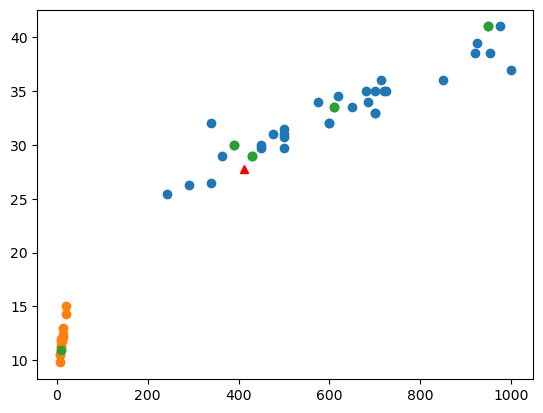

In [106]:
# 시각화로 확인
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1])
# plt.plot(new_data['Weight'],new_data['Length'],'r^')
# plt.scatter(twoDF.iloc[neighbors]['Weight'], twoDF.iloc[neighbors]['Length'])
plt.show()